## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice=combined_df["Mouse ID"].value_counts()
len(mice)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = combined_df.loc[combined_df["Mouse ID"]=="g989", :]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df[combined_df["Mouse ID"].isin(duplicate_mice)==False]

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = cleaned_df["Mouse ID"].value_counts()
len(clean_mice_count)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
groupby_drug = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
mean = groupby_drug.mean()
median = groupby_drug.median()
var = groupby_drug.var()
std = groupby_drug.std()
sem = groupby_drug.sem()

# Assemble the resulting series into a single summary dataframe.
summary_stats = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Variance": var,
    "Standard Deviation": std,
    "Standard Error": sem
})
summary_stats

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = cleaned_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std","sem"]})
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

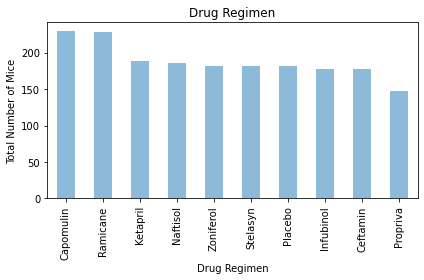

In [9]:
# TEST BEFORE HANDING IN
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_count = cleaned_df["Drug Regimen"].value_counts()
drug_count.plot(kind="bar", width=0.5, alpha=0.5)
plt.title("Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")
plt.tight_layout()
plt.show()

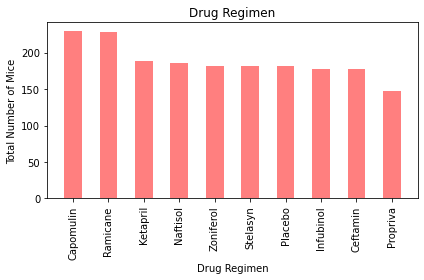

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(drug_count))
plt.bar(x_axis, drug_count, color="r", width=0.5, alpha=0.5)
tick_location = [value for value in x_axis]
plt.xticks(tick_location, drug_count.index, rotation=90)
plt.title("Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")
plt.tight_layout()
plt.show()

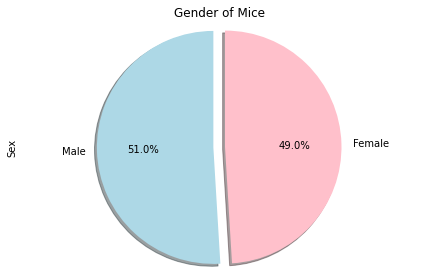

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = cleaned_df["Sex"].value_counts()
colors = ["lightblue", "pink"]
explode = (0.1, 0)
gender_count.plot(kind="pie", startangle=90, autopct="%1.1f%%", colors=colors, explode=explode, shadow=True)
plt.title("Gender of Mice")
plt.axis("equal")
plt.tight_layout()

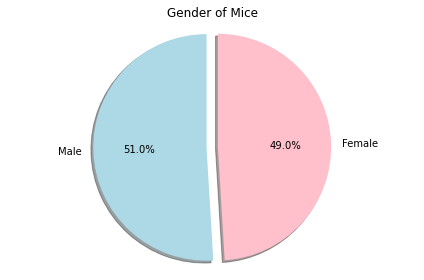

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["lightblue", "pink"]
explode = (0.1, 0)
plt.pie(gender_count, labels=gender_count.index, startangle=90, autopct="%1.1f%%", colors=colors, explode=explode, shadow=True)
plt.title("Gender of Mice")
plt.axis("equal")
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin", :]

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
last_volume = cleaned_df.groupby("Mouse ID").max()["Timepoint"]
volume_df = pd.DataFrame(last_volume)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(volume_df, cleaned_df, on=("Mouse ID", "Timepoint"), how="left")

# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
tumour_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumour_volume = merge_df.loc[merge_df["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumour_volume_list.append(tumour_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles =tumour_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(drug)
    print(f"The lower quartile of {drug} tumors: {lowerq}")
    print(f"The upper quartile of {drug} tumors: {upperq}")
    print(f"The interquartile range of {drug} tumors: {iqr}")
    print(f"The median of {drug} tumors: {quartiles[0.5]} ")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("------------------------------------------------")


Capomulin
The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
------------------------------------------------
Ramicane
The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
------------------------------------------------
Infubinol
The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outli

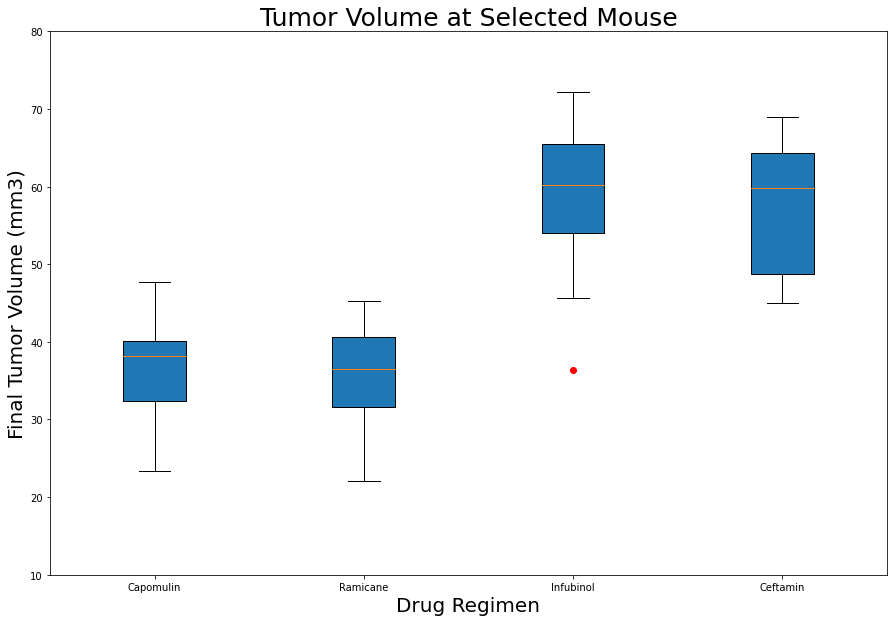

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#create list of box plots values and labels
regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

#create boxplot
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 20)
ax1.set_xlabel('Drug Regimen',fontsize = 20)
ax1.boxplot(tumour_volume_list, 0, "r", labels=regimen, widths = 0.3, patch_artist=True,vert=True)
plt.ylim(10, 80)
plt.show()


## Line and Scatter Plots

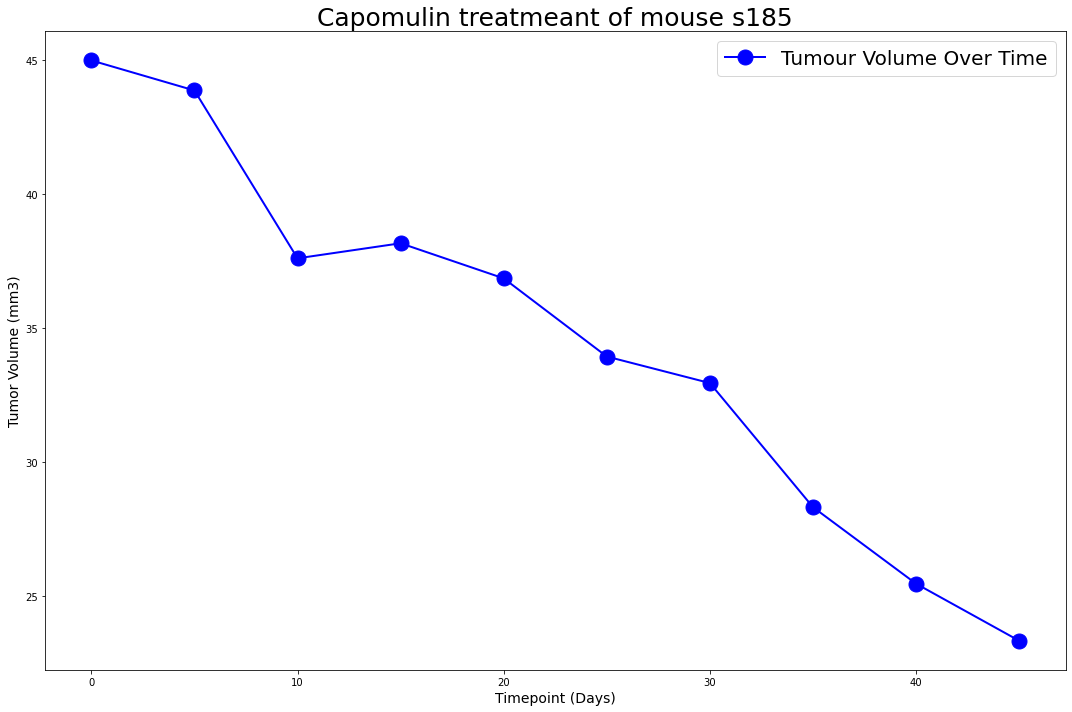

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomilin_df = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin", :]
line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
x_axis = line_df["Timepoint"]
tumsiz = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant of mouse s185',fontsize =25)
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)
plt.legend(["Tumour Volume Over Time"], fontsize=20)
plt.tight_layout()
plt.show()

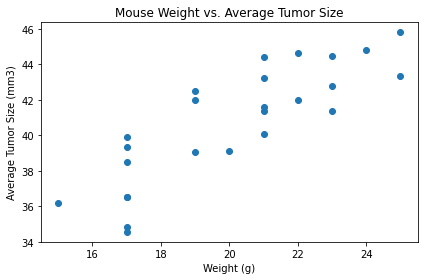

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_capm_vol =capomulin_df.groupby(['Mouse ID']).mean()
x_axis = avg_capm_vol['Weight (g)']
y_axis = avg_capm_vol['Tumor Volume (mm3)']

plt.scatter(x_axis, y_axis, marker="o")
plt.title("Mouse Weight vs. Average Tumor Size")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Size (mm3)")
plt.tight_layout()
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_axis = avg_capm_vol['Weight (g)']
y_axis = avg_capm_vol['Tumor Volume (mm3)']
corr = round(st.pearsonr(x_axis, y_axis)[0], 4)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.8419


In [19]:
x_axis = avg_capm_vol['Weight (g)']
y_axis = avg_capm_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
pandas (Correlation coefficient):0.8419
stderr:0.1275435903320134
y = 0.95x + 21.55


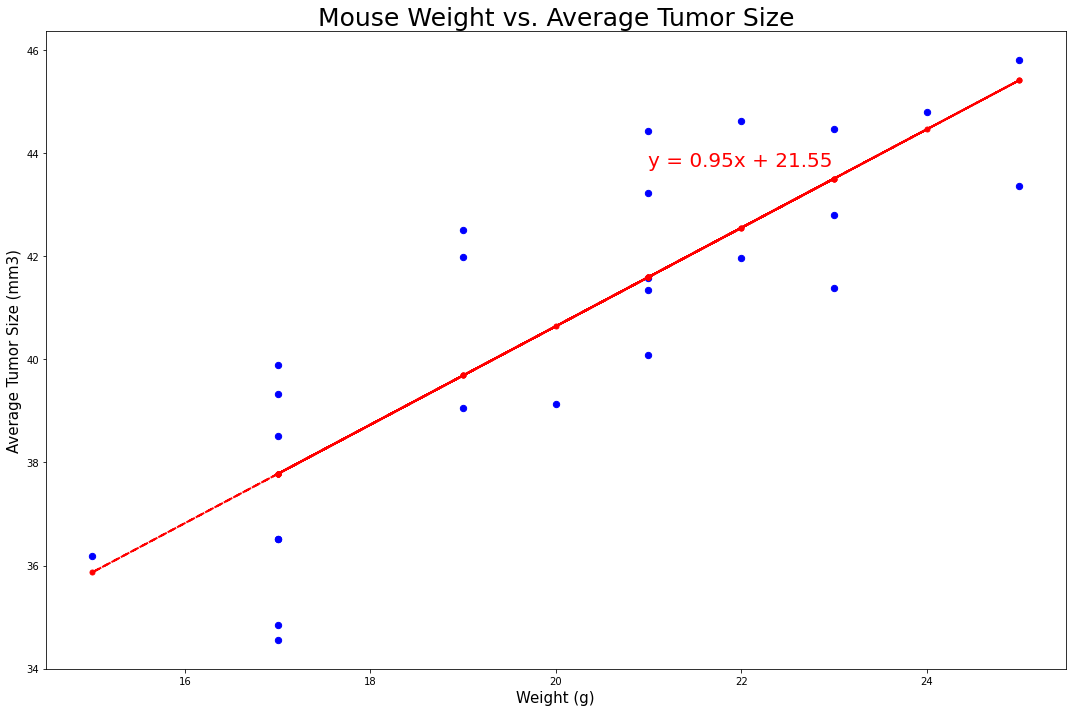

In [20]:
#Create figure and add regression line
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_axis, y_axis, color="b", s=40)
plt.plot(x_axis, regress_values, color='r', marker='o', linestyle='dashed', linewidth=2, markersize=5)
plt.title("Mouse Weight vs. Average Tumor Size", fontsize=25)
plt.xlabel("Weight (g)", fontsize=15)
plt.ylabel("Average Tumor Size (mm3)", fontsize=15)
ax1.annotate(line_eq, xy=(21,43.75), fontsize=20, color="r")
plt.tight_layout()
plt.show()